In [1]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{t^2}} + 2 \frac {\partial{u}} {\partial{t}}= \frac {\partial ^ 2 {u}} {\partial{x^2}} + 2 \frac {\partial{u}} {\partial{x}} - 3u, \\
U(0, t) = exp(-t) \cdot cos(2t), \\
U(\frac {\pi} {2}, t) = 0, \\
U(x, 0) = exp(-x) \cdot cos(x), \\
U_t(x, 0) = -exp(-x) \cdot cos(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-t - x) \cdot cos(x) \cdot cos(2t)
\end{align}

**В данной лабораторной работе используется 3 вида аппроксимации граничных условий:**
1. двухточечная аппроксимация с первым порядком
2. трехтоточная аппроксимация со вторым порядком
3. двухточечная аппроксимация со вторым порядком

In [2]:
def __init__(self, params, equation_type):
    self.data = Data(params)
    self.h = 0
    self.tau = 0
    self.sigma = 0
    try:
        self.solve_func = getattr(self, f'{equation_type}_solver')
    except:
        raise Exception("This type does not exist")

def solve(self, N, K, T):
    self.h = self.data.l / N
    self.tau = T / K
    self.sigma = (self.tau ** 2) / (self.h ** 2)
    return self.solve_func(N, K, T)

def analyticSolve(self, N, K, T):
    self.h = self.data.l / N
    self.tau = T / K
    self.sigma = (self.tau ** 2) / (self.h ** 2)
    u = np.zeros((K, N))
    for k in range(K):
        for j in range(N):
            u[k][j] = self.data.solution(j * self.h, k * self.tau)
    return u

def calculate(self, N, K):
    u = np.zeros((K, N))

    for j in range(0, N - 1):
        x = j * self.h
        u[0][j] = self.data.psi1(x)

        if self.data.approximation == 'p1':
            u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + self.data.psi1_dir2(x) * \
                        (self.tau ** 2 / 2)
        elif self.data.approximation == 'p2':
            u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + \
                        (self.data.psi1_dir2(x) + self.data.b * self.data.psi1_dir1(x) +
                        self.data.c * self.data.psi1(x) + self.data.f()) * (self.tau ** 2 / 2)

    return u

def implicit_solver(self, N, K, T):
    u = self.calculate(N, K)

    a = np.zeros(N)
    b = np.zeros(N)
    c = np.zeros(N)
    d = np.zeros(N)

    for k in range(2, K):
        for j in range(1, N):
            a[j] = self.sigma
            b[j] = -(1 + 2 * self.sigma)
            c[j] = self.sigma
            d[j] = -2 * u[k - 1][j] + u[k - 2][j]

        if self.data.bound_type == 'a1p2':
            b[0] = self.data.alpha / self.h / (self.data.beta - self.data.alpha / self.h)
            c[0] = 1
            d[0] = 1 / (self.data.beta - self.data.alpha / self.h) * self.data.phi0(k * self.tau)
            a[-1] = -self.data.gamma / self.h / (self.data.delta + self.data.gamma / self.h)
            d[-1] = 1 / (self.data.delta + self.data.gamma / self.h) * self.data.phi1(k * self.tau)

        elif self.data.bound_type == 'a2p3':
            k1 = 2 * self.h * self.data.beta - 3 * self.data.alpha
            omega = self.tau ** 2 * self.data.b / (2 * self.h)
            xi = self.data.d * self.tau / 2

            b[0] = 4 * self.data.alpha - self.data.alpha / (self.sigma + omega) * \
                    (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2)
            c[0] = k1 - self.data.alpha * (omega - self.sigma) / (omega + self.sigma)
            d[0] = 2 * self.h * self.data.phi0(k * self.tau) + self.data.alpha * d[1] / (-self.sigma - omega)
            a[-1] = -self.data.gamma / (omega - self.sigma) * \
                    (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2) - 4 * self.data.gamma
            d[-1] = 2 * self.h * self.data.phi1(k * self.tau) - self.data.gamma * d[-2] / (omega - self.sigma)

        elif self.data.bound_type == 'a2p2':
            b[0] = 2 * self.data.a / self.h
            c[0] = -2 * self.data.a / self.h + self.h / self.tau ** 2 - self.data.c * self.h + \
                    -self.data.d * self.h / (2 * self.tau) + \
                    self.data.beta / self.data.alpha * (2 * self.data.a + self.data.b * self.h)
            d[0] = self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) - self.h * self.data.f() + \
                    -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                    (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(k * self.tau)
            a[-1] = -b[0]
            d[-1] = self.h / self.tau ** 2 * (-u[k - 2][0] + 2 * u[k - 1][0]) + self.h * self.data.f() + \
                    self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                    (2 * self.data.a + self.data.b * self.h) / self.data.alpha * self.data.phi1(k * self.tau)

        u[k] = tma(a, b, c, d)

    return u

def _left_bound_a1p2(self, u, k, t):
    coeff = self.data.alpha / self.h
    return (-coeff * u[k - 1][1] + self.data.phi0(t)) / (self.data.beta - coeff)

def _right_bound_a1p2(self, u, k, t):
    coeff = self.data.gamma / self.h
    return (coeff * u[k - 1][-2] + self.data.phi1(t)) / (self.data.delta + coeff)

def _left_bound_a2p2(self, u, k, t):
    n = self.data.c * self.h - 2 * self.data.a / self.h - self.h / self.tau ** 2 - self.data.d * self.h / \
        (2 * self.tau) + self.data.beta / self.data.alpha * (2 * self.data.a - self.data.b * self.h)
    return 1 / n * (- 2 * self.data.a / self.h * u[k][1] +
                    self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) +
                    -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + -self.h * self.data.f() +
                    (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(t))

def _right_bound_a2p2(self, u, k, t):
    n = -self.data.c * self.h + 2 * self.data.a / self.h + self.h / self.tau ** 2 + self.data.d * self.h / \
        (2 * self.tau) + self.data.delta / self.data.gamma * (2 * self.data.a + self.data.b * self.h)
    return 1 / n * (2 * self.data.a / self.h * u[k][-2] +
                    self.h / self.tau ** 2 * (2 * u[k - 1][-1] - u[k - 2][-1]) +
                    self.data.d * self.h / (2 * self.tau) * u[k - 2][-1] + self.h * self.data.f() +
                    (2 * self.data.a + self.data.b * self.h) / self.data.gamma * self.data.phi1(t))

def _left_bound_a2p3(self, u, k, t):
    denom = 2 * self.h * self.data.beta - 3 * self.data.alpha
    return self.data.alpha / denom * u[k - 1][2] - 4 * self.data.alpha / denom * u[k - 1][1] + \
            2 * self.h / denom * self.data.phi0(t)

def _right_bound_a2p3(self, u, k, t):
    denom = 2 * self.h * self.data.delta + 3 * self.data.gamma
    return 4 * self.data.gamma / denom * u[k - 1][-2] - self.data.gamma / denom * u[k - 1][-3] + \
            2 * self.h / denom * self.data.phi1(t)

def explicit_solver(self, N, K, T):
    global left_bound, right_bound
    u = self.calculate(N, K)

    # for j in range(1, N - 1):
    #     u[1][j] = self.data.ps1()
    if self.data.bound_type == 'a1p2':
        left_bound = self._left_bound_a1p2
        right_bound = self._right_bound_a1p2

    elif self.data.bound_type == 'a2p2':
        left_bound = self._left_bound_a2p2
        right_bound = self._right_bound_a2p2

    elif self.data.bound_type == 'a2p3':
        left_bound = self._left_bound_a2p3
        right_bound = self._right_bound_a2p3

    for k in range(2, K):
        t = k * self.tau
        for j in range(1, N - 1):
            # u[k][j] = self.sigma * u[k - 1][j + 1] + (2 - 2 * self.sigma) * u[k - 1][j] + \
            #           self.sigma * u[k - 1][j - 1] - u[k - 2][j]
            quadr = self.tau ** 2
            tmp1 = self.sigma + self.data.b * quadr / (2 * self.h)
            tmp2 = self.sigma - self.data.b * quadr / (2 * self.h)
            u[k][j] = u[k - 1][j + 1] * tmp1 + \
                u[k - 1][j] * (-2 * self.sigma + 2 + self.data.c * quadr) + \
                u[k - 1][j - 1] * tmp2 - u[k - 2][j] + quadr * self.data.f()

        u[k][0] = left_bound(u, k, t)
        u[k][-1] = right_bound(u, k, t)

    return u

Input equation type (example: explicit)

In [3]:
equation_type = str(input())

In [4]:
N = 70
K = 764
T = 1
params = {
        'a': 1,
        'b': 2,
        'c': -3,
        'd': 2,
        'l': np.pi / 2,
        'f': lambda: 0,
        'alpha': 1,
        'beta': 0,
        'gamma': 1,
        'delta': 0,
        'psi1': lambda x: np.exp(-x) * np.cos(x),
        'psi2': lambda x: -np.exp(-x) * np.cos(x),
        'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
        'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
        'phi0': lambda t: np.exp(-t) * np.cos(2 * t),
        'phi1': lambda t: 0,
        'bound_type': 'a1p2',
        'approximation': 'p1',
        'solution': lambda x, t: np.exp(-t - x) * np.cos(x) * np.cos(2 * t),
    }

In [5]:
params['bound_type'] = 'a1p2'

In [6]:
solver = HyperbolicSolver(params, equation_type)

In [7]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [8]:
print("Sigma:", solver.sigma)

Sigma: 0.003402276526462098


In [9]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    surf = ax.plot_surface(x, t, z1, cmap=cm.PiYG,
                    linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=15)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.PiYG,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

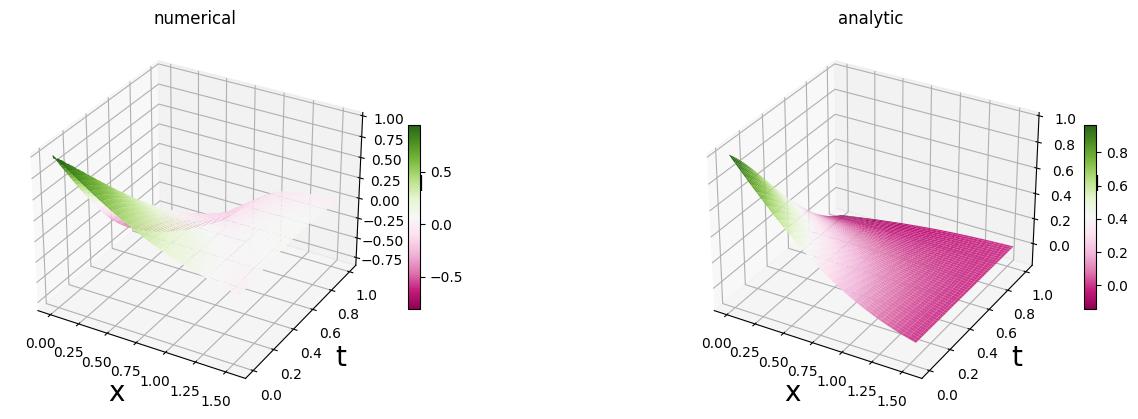

In [10]:
draw(dict_ans, N, K, T)

In [11]:
def draw_u_x(dict_, N, K, T, time, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    

    plt.title('U from x')
    plt.plot(x, z1[time], color='r', label='numerical')
    plt.plot(x, z2[time], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/100)
    plt.title('Error from t')
    plt.plot(t, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

Time check

In [12]:
curr_time = int(input())

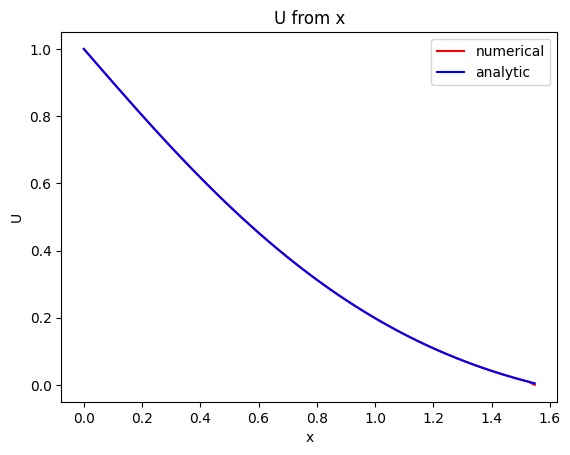

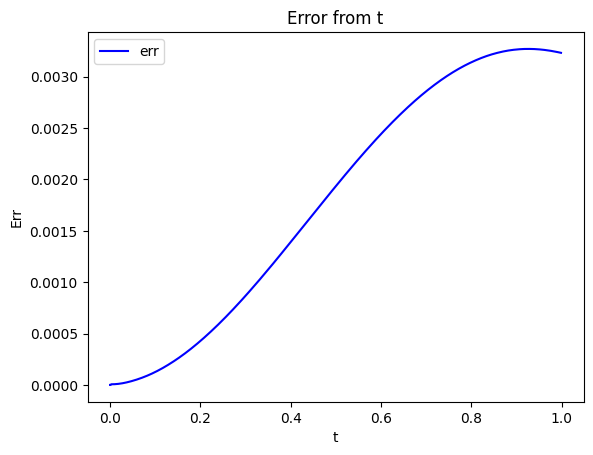

In [13]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [14]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [15]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0047702677544667815]


Middle elements in error array:

In [16]:
print(error[int(K/2)])

[0.6533298947543553, 0.6413036782379793, 0.6280938980579494, 0.6138916069761237, 0.5986351381119496, 0.5819306510814647, 0.5653575224655274, 0.5457917691172085, 0.5279304227979325, 0.5068628666079791, 0.48536496708249044, 0.4653862159192741, 0.4405530817817675, 0.41693836965260667, 0.3954408031713797, 0.36840746219744963, 0.3399685706309322, 0.31666044566934703, 0.293101021018952, 0.262321053669872, 0.22710178262458658, 0.19554077072116993, 0.17249387977214015, 0.1575957121986984, 0.14804397930917368, 0.141231191987248, 0.13560031211378545, 0.1304404732702915, 0.12548654815312218, 0.12065504646276984, 0.11592349558508588, 0.11128686366044147, 0.10674440302900748, 0.10229623038675223, 0.0979425485122018, 0.09368349130405051, 0.08951909865770857, 0.08544931393036746, 0.08147397590413631, 0.07759276239035112, 0.07380490924008959, 0.07010801783274712, 0.06649365260983488, 0.06293339701888702, 0.059342121495618544, 0.05550223298554406, 0.050959170235416885, 0.044992206126189885, 0.036892613

Last elements in error array:

In [17]:
print(error[-1])

[0.6505329391810617, 0.65716263506378, 0.6626995777712741, 0.6670863632214004, 0.6705623163455108, 0.672761244998589, 0.6743888719809908, 0.674422227687222, 0.6743725051602729, 0.6723655079114407, 0.6705890274990195, 0.6669596984883269, 0.6630689630949737, 0.6584495663191201, 0.6521293319777426, 0.6465796914986884, 0.6385760492843741, 0.6308823385384571, 0.6226852700733783, 0.6121784655397032, 0.6029545555032202, 0.5918156255920008, 0.578752840119345, 0.5665409308759167, 0.5507989463600622, 0.5314458238625287, 0.5112381975176586, 0.486642769308765, 0.45798973906179297, 0.43165887749922704, 0.40838543658466164, 0.384922821596456, 0.3619768770031762, 0.34057438666550804, 0.3180686069391379, 0.29320400905795074, 0.2688443913300076, 0.24713076079309576, 0.22675403098303873, 0.2055823099208995, 0.18205951051112668, 0.15543896695714304, 0.12821160017299044, 0.10495080921505517, 0.08674622501014839, 0.07202380142634172, 0.0608455109042651, 0.05242944819349986, 0.04475787908673363, 0.038216708

In [18]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.32795465746418245


In [19]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.00042926002285887754


In [20]:
equation_type = str(input())

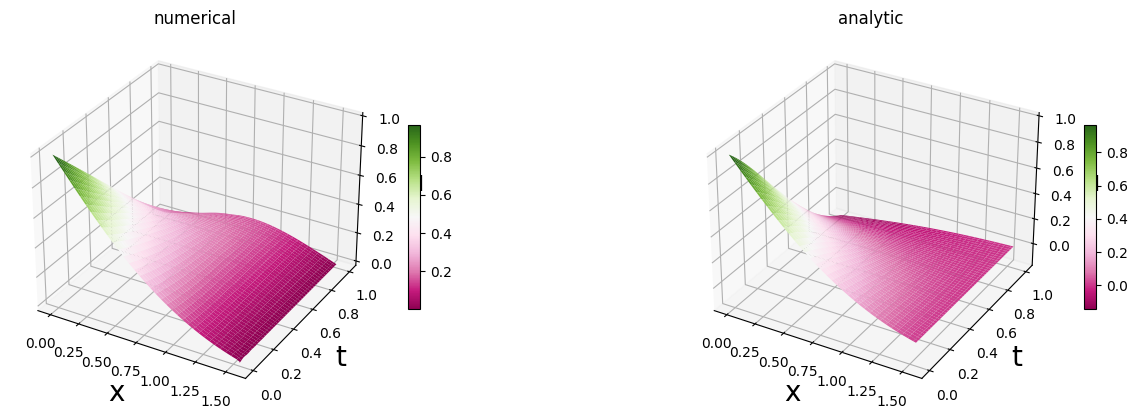

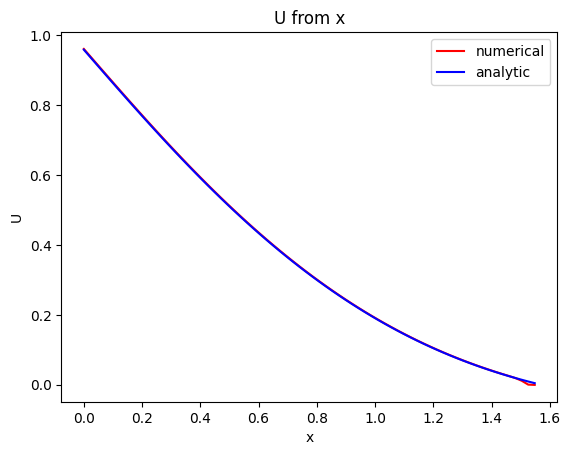

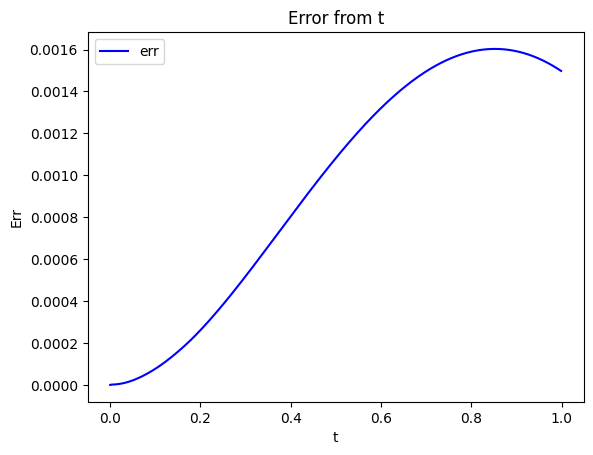

In [21]:
N = 70
K = 764
T = 1
curr_time = 30
params['bound_type'] = 'a1p2'
solver = HyperbolicSolver(params, equation_type)
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }
draw(dict_ans, N, K, T)
draw_u_x(dict_ans, N, K, T, curr_time)